# RSAM notebook

In this tutorial, we will explore Real-time Seismic Amplitude Measurement (RSAM) data. RSAM is, by definition, computed on raw seismic data, so we can also think of it as "Raw" Seismic Amplitude Measurement, to distinguish from similar measurements we will make later on velocity and displacement seismograms.

## 1. Background

### 1.1 Motivation

Imagine it is Spring 1985, and you are at the only Seismologist at the USGS Cascades Volcano Observatory (CVO). Tremor is appearing on the helical drum recorders, and has appeared before most of the explosive eruptions over the past 5 years. The authorities want to know if the tremor now is as strong as it was right before the catastrophic May 18, 1980 sector collapse. 

Volcano-seismic monitoring was simple, and largely consisted of:
1. Counting the number of earthquakes each day on the drum records ("daily counts")
2. Locating and mapping volcano-tectonic earthquakes, and estimating their magnitudes ("catalog production/analysis")
3. During heightened times of unrest, manning an Operations Room 24-7 with analysts continuously watching the drums, and communicating with field crews by 2-way radio ("real-time monitoring")

So all you have is the drum records (hundreds of large sheets of paper) and the catalog. You don't have any digital version of the continuous seismic data sitting on a hard drive, or on a CD. Why? 
- CD-ROM drives didn't appear until ~1990
- hard drive storage was too expensive. Here is a quick calculation:

In [ ]:
# Algorithm to compute raw storage space needed for seismic data
def storage_space(samplingRate=100, bitsPerSample=32, numComponentsPerStation=3, numStations=10):
    BITS_PER_BYTE = 8
    SECONDS_PER_DAY = 60 * 60 * 24
    bytesPerGb = 1024**3
    gbPerDayPerChannel = (samplingRate * (bitsPerSample/BITS_PER_BYTE) * SECONDS_PER_DAY) / bytesPerGb
    gbPerDayNetwork = gbPerDayPerChannel * numComponentsPerStation * numStations
    print(f"Raw data requires {gbPerDayNetwork:.02f} GB of storage per day, and {gbPerDayNetwork * 365:.0f} GB per year")

    dollarsPerTB = {'1985':31400000, '2000':4070, '2023':14.3}
    print("\nStorage cost for 1 year of data, in different years:")
    for key in dollarsPerTB:  
        print(f"{key}: US${(gbPerDayNetwork * 365 * dollarsPerTB[key]/1024):,.0f}")

    print("Data from https://ourworldindata.org/grapher/historical-cost-of-computer-memory-and-storage")


storage_space(samplingRate=100, bitsPerSample=32, numComponentsPerStation=3, numStations=10)
    

So back in 1985, hard drive storage for just one year of data from the Mount St. Helens seismic network would have cost ~US$10 Million!
Given these costs, STA/LTA algorithms were used to capture anomalous signals - volcanic earthquakes - while the continuous data were generally discarded (or at best, recorded to tape).

Anyway, so you don't have an easy way to compare tremor levels. But you sure as hell aren't going to be caught in this situation again! So what can you do? <em><font color='green'>You can store a massively downsampled version of the continuous seismic data instead!</font></em>

This idea led to the Real-time Seismic Amplitude Measurement (RSAM) system.

### 1.2 Original RSAM system

The RSAM system was built around a 8-bit analog-to-digital-converter PC card: software was too slow in those days. Components of the original RSAM system were:

<font color='blue'>
<ol>
<li>Real-time bar graphs: showing average seismic amplitudes over last 2.56 s, 1 minute, and 10 minutes</li>
<li><b>1 minute and 10 minute mean signal amplitudes, logged to binary files. This is what most volcano-seismologists today think of as "RSAM data"!</b></li>
<li>"RSAM events": created by a simple STA/LTA detector running on each channel (NSLC)</li>
<li>Multi-station event (e.g. earthquake) and tremor alarm systems</li>
<li>Trends in RSAM data and other datasets (e.g. earthquake counts, tiltmeter data, gas flux, deformation, etc.) could be visualized with another software package called "BOB"</li>
</ol></font>

<table border=1><tr><td><img width=100% src="images/EndoMurray1991fig7.png" ></td><td>Fig 7 from Endo & Murray (1991). Top panel shows RSAM event rate at closest station to Pinatubo. Bottom 3 panels show RSAM data from stations at increasing distances. 30 days of data are show</td></table></tr></table>

In the figure above, 30 days of RSAM data are shown for three seismic stations. Loading and plotting 30 days of raw seismic data takes a while, but 1-minute RSAM data downsamples the raw seismic data by a factor of 6,000 (assuming a 100 Hz sampling rate), so long RSAM timeseries (hours, days, weeks, months, etc.) can be quickly loaded and plotted.

Reference:
- Endo, E.T., Murray, T. Real-time Seismic Amplitude Measurement (RSAM): a volcano monitoring and prediction tool. Bull Volcanol 53, 533–545 (1991).__[https://doi.org/10.1007/BF00298154](pdf/RSAM_EndoMurray1991.pdf)__

## 2. Computing RSAM data

### 2.1 Simple example

Here is a minimal example of computing RSAM data from an ObsPy Stream object. The data come from station REF at Redoubt Volcano in Alaska on 2009/03/22.

In [36]:
####################### Common header #########################
import glob
import sys
from pathlib import Path
import obspy
localLibPath = Path.cwd().resolve().parents[0].joinpath('lib')
sys.path.append(str(localLibPath))
import SAM
SDS_DIR = Path.cwd().parents[1].joinpath('data','continuous','SDS')
SAM_DIR = Path.cwd().parents[1].joinpath('data','continuous','SAM')
###############################################################

In [ ]:
mseedfile = str(SDS_DIR.joinpath('2009','AV','REF','EHZ.D', 'AV.REF..EHZ.D.2009.081' ))
print(mseedfile)
st = obspy.read(mseedfile)
st.plot();
rsamObj10min = SAM.RSAM(stream=st, sampling_interval=600)
rsamObj10min.plot()

RSAM
Index(['min', 'mean', 'max', 'median', 'rms', 'VLP', 'LP', 'VT', 'fratio'], dtype='object')
METRIC:  min


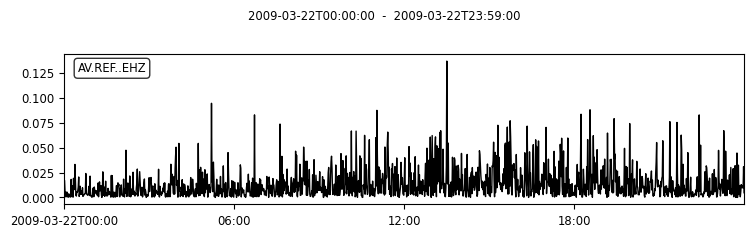

METRIC:  mean


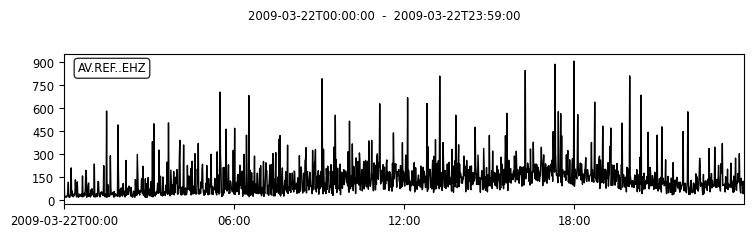

METRIC:  median


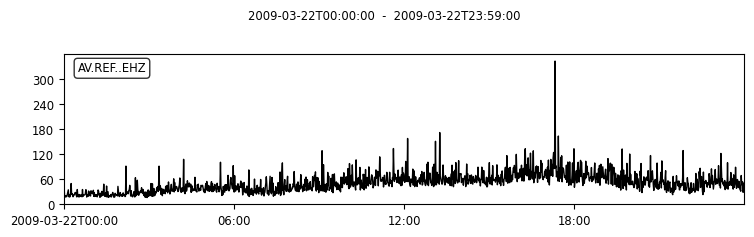

METRIC:  rms


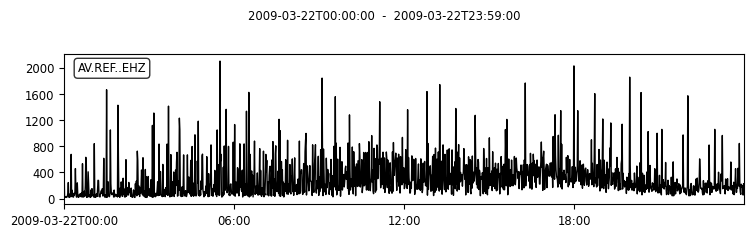

METRIC:  max


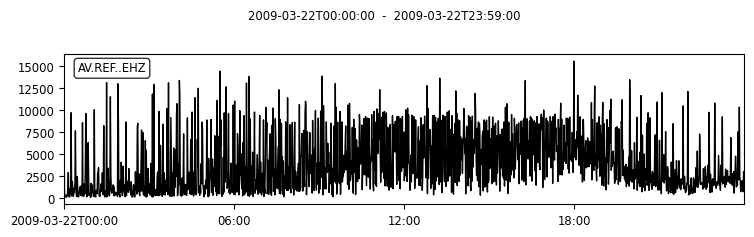

In [26]:
rsamObj60s = RSAM(stream=st, sampling_interval=60)
print(rsamObj60s.get_metrics())
rsamObj60s.plot(metrics=['min','mean','median','rms','max'])

METRIC:  VLP


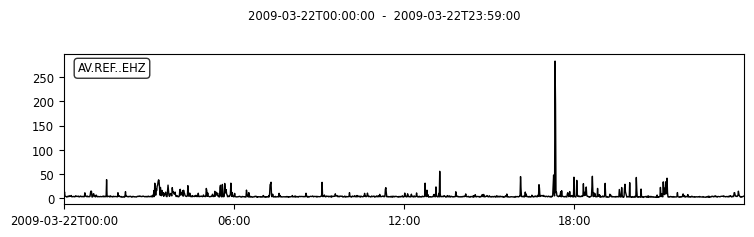

METRIC:  LP


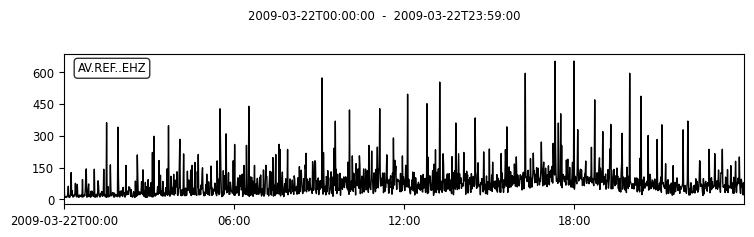

METRIC:  VT


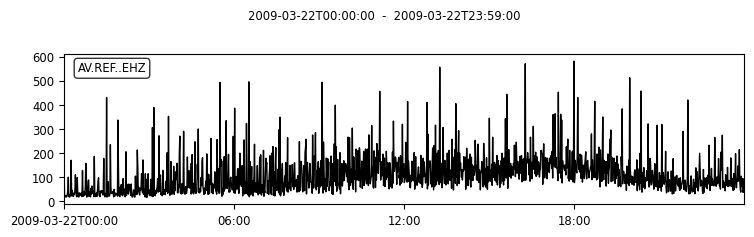

METRIC:  fratio


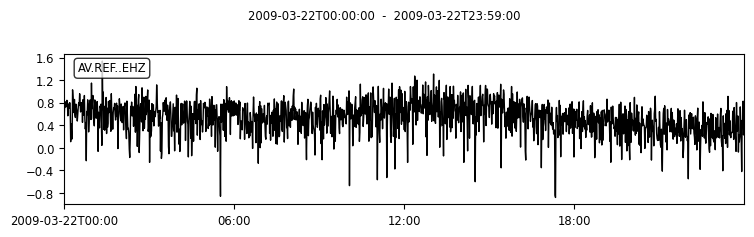

In [19]:
rsamObj60s.plot(metrics='bands') # shorthand for metrics=['VLP', 'LP', 'VT', 'fratio']

In [20]:
help(rsamObj60s)

Help on RSAM in module SAM object:

class RSAM(SAM)
 |  RSAM(dataframes=None, stream=None, sampling_interval=60.0, filter=[0.5, 18.0], bands={'VLP': [0.02, 0.2], 'LP': [0.5, 4.0], 'VT': [4.0, 18.0]}, corners=4, clip=None, verbose=False)
 |  
 |  Method resolution order:
 |      RSAM
 |      SAM
 |      builtins.object
 |  
 |  Class methods defined here:
 |  
 |  readRSAMbinary(SAM_DIR, station, stime, etime) from builtins.type
 |      read one (or many if station is a list) RSAM binary file(s) recorded by the original RSAM system
 |      return corresponding RSAM object
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  check_units(st)
 |  
 |  get_filename(SAM_DIR, id, year, sampling_interval, ext, name='RSAM')
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from SAM:
 |  
 |  __init__(self, dataframes=None, stream=None, sampling_interval=60.0, filter=[0.5, 18.

In [22]:
print(rsamObj60s)

Metrics: min,mean,max,median,rms,VLP,LP,VT,fratio
Sampling Interval=60.0 s

AV.REF..EHZ: 2009-03-22T00:00:00 to 2009-03-22T23:59:00



In [24]:
print('RSAM dataframe for one Trace id (net.sta.loc.chan):')
print(rsamObj.dataframes['AV.REF..EHZ'].head())

RSAM dataframe for one Trace id (net.sta.loc.chan):
           time       min       mean          max     median         rms  \
0  1.237680e+09  0.000215  51.515633  7074.898354  21.765519  174.500828   
1  1.237681e+09  0.000302  51.170881  9705.165055  22.077007  227.370123   
2  1.237681e+09  0.001383  54.483322  7657.244879  22.671976  179.050936   
3  1.237682e+09  0.001040  43.627366  8584.674018  20.224040  179.065892   
4  1.237682e+09  0.001078  67.647696  9628.304207  22.314812  288.483812   

        VLP         LP         VT    fratio  
0  4.994142  28.031998  43.249170  0.625598  
1  4.036320  29.661290  41.445656  0.482640  
2  3.777240  30.096384  45.615030  0.599919  
3  3.574974  23.489833  36.707111  0.644023  
4  4.632622  41.918698  52.120577  0.314259  


There are just two columns, which are 'time', and 'mean'. 
- 'time' is in Unix epoch seconds (since 1970-01-01 00:00:00)
- 'mean' just holds the mean seismic amplitude within that 60-s time window (Sampling Interval=60.0s)

## 2.2 Non-trivial example



In [34]:
from obspy.clients.filesystem.sds import Client as sdsclient

# Compute RSAM in 1-day chunks for multiple network-station-location-channel's
mySDSclient = sdsclient(str(SDS_DIR))
startTime = obspy.core.UTCDateTime(2003,7,11)
endTime = obspy.core.UTCDateTime(2003,7,16)
secondsPerDay = 60 * 60 * 24
numDays = (endTime-startTime)/secondsPerDay
daytime = startTime
while daytime < endTime:
    print(f'Loading Stream data for {daytime}')
    st = mySDSclient.get_waveforms("MV", "*", "*", "[SBEHCD]*", daytime, daytime+secondsPerDay)
    print(f'- got {len(st)} Trace ids')
    print(f'Computing RSAM metrics for {daytime}, and saving to pickle files')
    rsamMV24h = SAM.RSAM(stream=st, sampling_interval=60)
    rsamMV24h.write(str(SAM_DIR), ext='csv', overwrite=True)
    daytime += secondsPerDay
del mySDSclient

Loading Stream data for 2003-07-11T00:00:00.000000Z
- got 8 Trace ids
Computing RSAM metrics for 2003-07-11T00:00:00.000000Z, and saving to pickle files
RSAM
write
Writing /Users/thompsong/Developer/skience2024/Monday_Afternoon/data/continuous/SAM/RSAM_MV.MBGB..BHZ_2003_60s.csv
Writing /Users/thompsong/Developer/skience2024/Monday_Afternoon/data/continuous/SAM/RSAM_MV.MBGH..BHZ_2003_60s.csv
Writing /Users/thompsong/Developer/skience2024/Monday_Afternoon/data/continuous/SAM/RSAM_MV.MBLG..SHZ_2003_60s.csv
Writing /Users/thompsong/Developer/skience2024/Monday_Afternoon/data/continuous/SAM/RSAM_MV.MBLY..BHZ_2003_60s.csv
Writing /Users/thompsong/Developer/skience2024/Monday_Afternoon/data/continuous/SAM/RSAM_MV.MBRV..SHZ_2003_60s.csv
Writing /Users/thompsong/Developer/skience2024/Monday_Afternoon/data/continuous/SAM/RSAM_MV.MBRY..BHZ_2003_60s.csv
Writing /Users/thompsong/Developer/skience2024/Monday_Afternoon/data/continuous/SAM/RSAM_MV.MBSS..SHZ_2003_60s.csv
Writing /Users/thompsong/Develo

Metrics: min,mean,max,median,rms,VLP,LP,VT,fratio
Sampling Interval=60.0 s

MV.MBGH..BHZ: 2003-07-15T00:00:00 to 2003-07-15T23:59:00
MV.MBRV..SHZ: 2003-07-15T00:00:00 to 2003-07-15T23:59:00
MV.MBSS..SHZ: 2003-07-15T00:00:00 to 2003-07-15T23:59:00
MV.MBGB..BHZ: 2003-07-15T00:00:00 to 2003-07-15T23:59:00
MV.MBLG..SHZ: 2003-07-15T00:00:00 to 2003-07-15T23:59:00
MV.MBLY..BHZ: 2003-07-15T00:00:00 to 2003-07-15T23:59:00
MV.MBRY..BHZ: 2003-07-15T00:00:00 to 2003-07-15T23:59:00
MV.MBWH..SHZ: 2003-07-15T00:00:00 to 2003-07-15T23:59:00

METRIC:  median


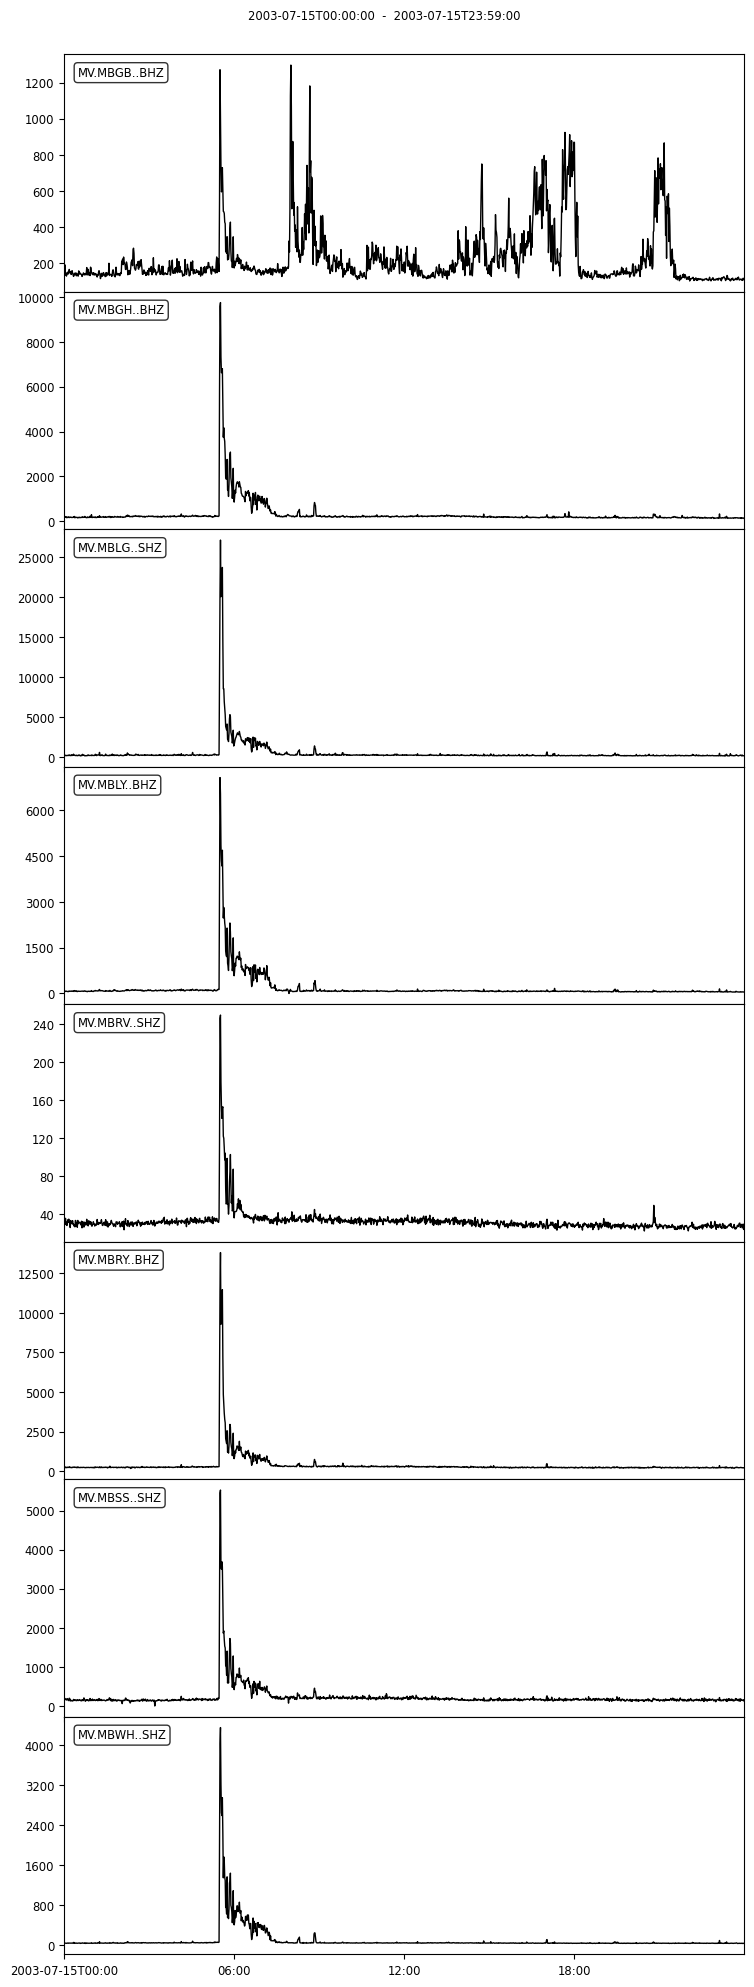

In [35]:
# Read all the RSAM data back, and plot
rsamObj = SAM.RSAM.read(startTime, endTime, SAM_DIR=str(SAM_DIR), ext='csv')
print(rsamObj)
rsamObj.plot(metrics='median')

## 3. RSAM data processing

We can process the data in various ways, e.g. using select(), downsample(), 

## 3. Legacy RSAM data 

### 3.1 Loading legacy RSAM data from binary files

The RSAM system was used at many observatories, and so many observatories have archives of RSAM binary files. But we can read these, making them Interoperable and Reusable. (Tiltmeter was saved in the same format, and so can also be read).

Next we will load 1 year of RSAM data for 8 stations recorded by the original RSAM system that was deployed in Montserrat. These data only have a 'mean' metric - it is just how they were recorded at the time.


Reading  /Users/thompsong/Developer/skience2024/Monday_Afternoon/data/continuous/SAM/binary/MGHZ1996.DAT
Reading  /Users/thompsong/Developer/skience2024/Monday_Afternoon/data/continuous/SAM/binary/MGAT1996.DAT
Reading  /Users/thompsong/Developer/skience2024/Monday_Afternoon/data/continuous/SAM/binary/MRYT1996.DAT
Reading  /Users/thompsong/Developer/skience2024/Monday_Afternoon/data/continuous/SAM/binary/MLGT1996.DAT
RSAM
Metrics: mean
Sampling Interval=60.0 s

MV.MGHZ..EHZ: 1996-01-01T00:00:00 to 1996-12-31T23:59:00
MV.MGAT..EHZ: 1996-01-01T00:00:00 to 1996-12-31T23:59:00
MV.MRYT..EHZ: 1996-01-01T00:00:00 to 1996-12-31T23:59:00
MV.MLGT..EHZ: 1996-01-01T00:00:00 to 1996-12-31T23:59:00

METRIC:  mean


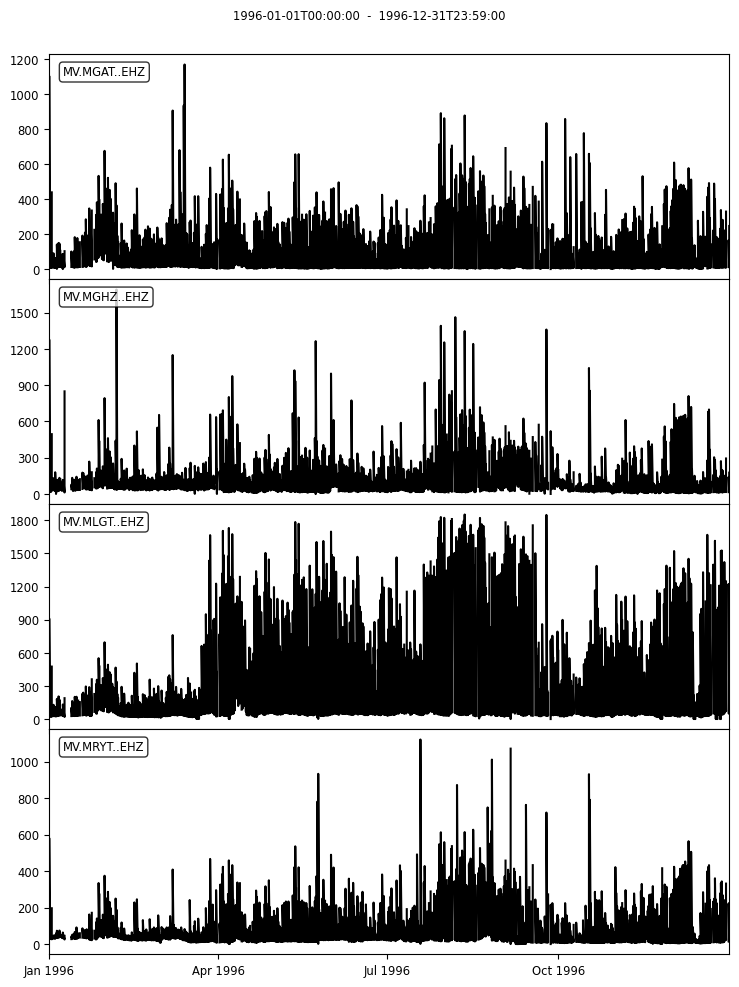

In [45]:
stime = obspy.core.UTCDateTime(1996,1,1,0,0,0)
etime = obspy.core.UTCDateTime(1996,12,31,23,59,59)
BINARY_DIR = SAM_DIR.joinpath('binary')
files = list(BINARY_DIR.glob(f'M???{stime.year}.DAT'))
stations = [path.name[0:4] for path in files]
rsamObj = RSAM.readRSAMbinary(str(BINARY_DIR), stations, stime, etime)
print(rsamObj)
rsamObj.plot()

### 3.2 Converting legacy RSAM binary files to modern RSAM CSV/Pickle files
Since we have already read the binary files into a (single) RSAM object, writing them to modern RSAM data format is as simple as:

In [46]:
rsamObj.write(str(SAM_DIR), ext='csv')

write
Writing /Users/thompsong/Developer/skience2024/Monday_Afternoon/data/continuous/SAM/RSAM_MV.MGHZ..EHZ_1996_60s.csv
Writing /Users/thompsong/Developer/skience2024/Monday_Afternoon/data/continuous/SAM/RSAM_MV.MGAT..EHZ_1996_60s.csv
Writing /Users/thompsong/Developer/skience2024/Monday_Afternoon/data/continuous/SAM/RSAM_MV.MRYT..EHZ_1996_60s.csv
Writing /Users/thompsong/Developer/skience2024/Monday_Afternoon/data/continuous/SAM/RSAM_MV.MLGT..EHZ_1996_60s.csv


## 4. RSAM data processing and analysis

### 4.1 read and plot

Next we will:
- (re-)read (from disk) the RSAM data from 1996-02-15 to 1996-10-12 for select SEED ids
- plot the data. By default, the plot() method will convert RSAM dataframes into an ObsPy Stream object, so it can be plotted in a familiar way.

METRIC:  mean


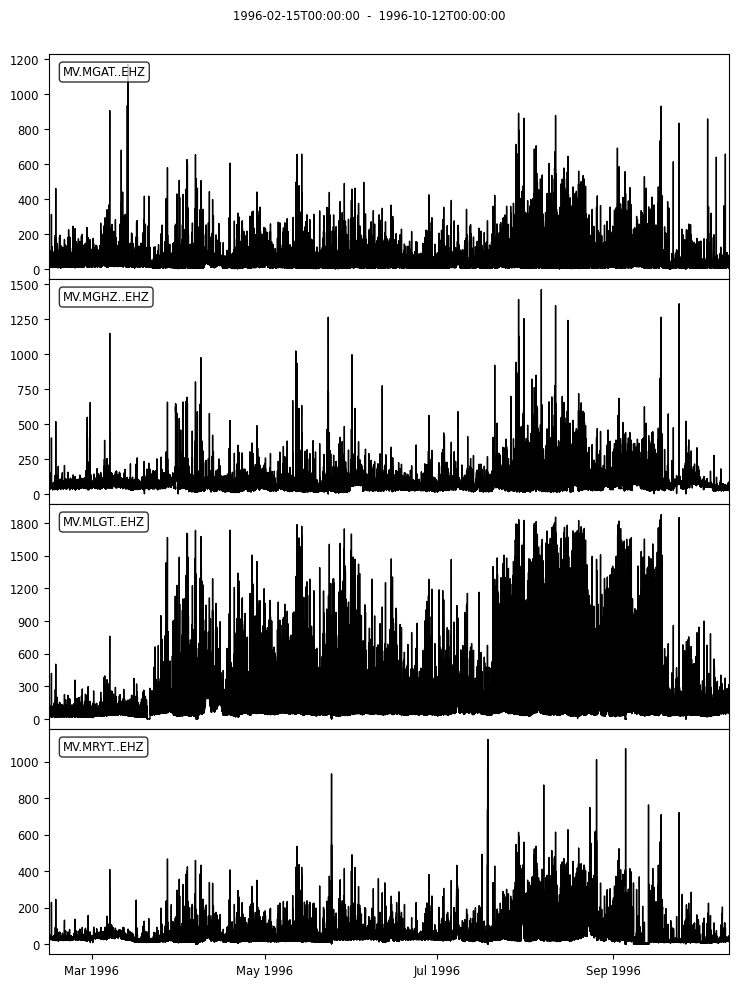

Metrics: mean
Sampling Interval=60.0 s

MV.MGAT..EHZ: 1996-02-15T00:00:00 to 1996-10-12T00:00:00
MV.MLGT..EHZ: 1996-02-15T00:00:00 to 1996-10-12T00:00:00
MV.MGHZ..EHZ: 1996-02-15T00:00:00 to 1996-10-12T00:00:00
MV.MRYT..EHZ: 1996-02-15T00:00:00 to 1996-10-12T00:00:00



In [48]:
startt = obspy.core.UTCDateTime(1996,2,15)
endt = obspy.core.UTCDateTime(1996,10,12)
rsamObj = RSAM.read(startt, endt, SAM_DIR=str(SAM_DIR), ext='csv')
rsamObj.plot()   
print(rsamObj)

These RSAM plots above show the following general features:
1. Low seismicity in February and March.
2. An increase in seismicity around April 1st persists throughout to June. This period included the first pyroclastic density current (PDC) that reached the ocean on May 12, 1996.
3. A more significant increase in activity about 2/3rds of the way through July 1996. This was a time period in which the seismicity and the lava dome extrusion rate significantly increased, leading to numerous PDCs that reached the ocean, and even travelled for some distance upon the water. The increase is particularly noticeable on MV.MLGT..EHZ (3rd trace) as this was close to the Tar River Valley, where most PDCs were directed.
4. A sharp drop in seismicity from September 18, 1996, onwards.

These features may be more obvious if we smooth the data, which we can do with the downsample() method:

### 4.2 Trim and Downsample 

In [49]:
startt = obspy.core.UTCDateTime(1996,7,15)
endt = obspy.core.UTCDateTime(1996,9,1)

# trim
rsamObj.trim(starttime=startt, endtime=endt)

# downsample
rsamObjHourly = rsamObj.downsample(new_sampling_interval=3600) 

# plot
rsamObjHourly.plot()

# print
print(rsamObjHourly)

METRIC:  mean
Metrics: mean
Sampling Interval=3600.0 s

MV.MGAT..EHZ: 1996-07-15T00:29:30 to 1996-09-01T00:00:00
MV.MLGT..EHZ: 1996-07-15T00:29:30 to 1996-09-01T00:00:00
MV.MGHZ..EHZ: 1996-07-15T00:29:30 to 1996-09-01T00:00:00
MV.MRYT..EHZ: 1996-07-15T00:29:30 to 1996-09-01T00:00:00



In [ ]:
There are various periods here where there seem to be cycles in RSAM. Let us look at early August period in more detail:

RSAM
METRIC:  mean


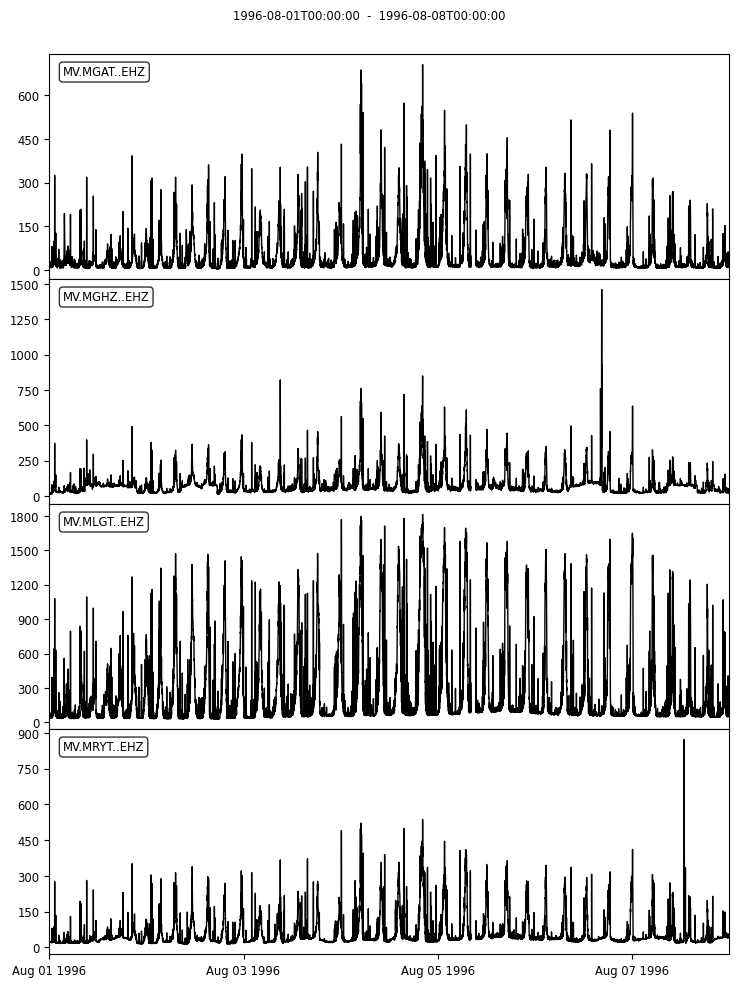

In [50]:
rsamObjSummer= rsamObj.copy()
rsamObjSummer.trim(starttime=obspy.core.UTCDateTime(1996,8,1), endtime=obspy.core.UTCDateTime(1996,8,8))
rsamObjSummer.plot(kind='stream', equal_scale=False) 

These are remarkable cycles in RSAM. They appear to be about 4-6 hours apart. This is a phenomenon called "banded tremor". During these tremor bands, visual observations indicated that the lava dome was extruding at particularly high rates (up to 20m^3 was one estimate I heard), and at the peak of each cycle there was often ash venting. I proposed that the tremor bands were indicated of pressure cycles within the conduit - but caused by what? 
One suggestion is that the magma rises up the conduit in a stick-slip fashion. Basically, it gets stuck for a while, as the pressure builds below, and then shear fractures, allowing magma to suddenly extrude very quickly. 

Can we use some ObsPy STA/LTA detection tools to detect these tremor bands, in the same way we normally detect much shorter transient events, but just with longer STA/LTA settings? Let us try first on a single NSLC. This is based on examples at https://docs.obspy.org/tutorial/code_snippets/trigger_tutorial.html, except we use longer STA and LTA time windows (15 and 100 minutes respectively), and we add a despiking step which attempts to remove transient events lasting a minute or less from the data before running the STA/LTA:


### 4.3 Tremor band detection with ObsPy trigger methods

#### 4.3.1 Single channel detection

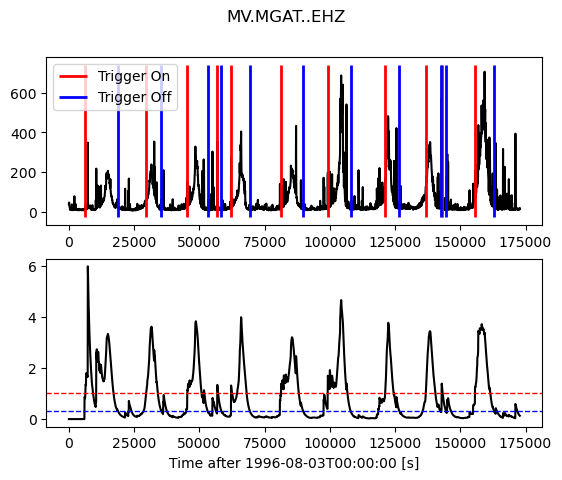

In [63]:
from obspy.signal.trigger import plot_trigger, classic_sta_lta, recursive_sta_lta

rsamObjSummer.despike(metrics='all')
st = rsamObjSummer.to_stream()
st2 =st.copy()
st2.trim(obspy.core.UTCDateTime(1996,8,3), obspy.core.UTCDateTime(1996,8,5))

sta_minutes = 15
lta_minutes = 100
threshON = 1.0
threshOFF = 0.3

cft = recursive_sta_lta(st2[0].data, sta_minutes, lta_minutes)

plot_trigger(st2[0], cft, threshON, threshOFF)

That seems to work quite well. Now let us try an event detector that uses several NSLC at once.

#### 4.3.2 Multi-channel detection

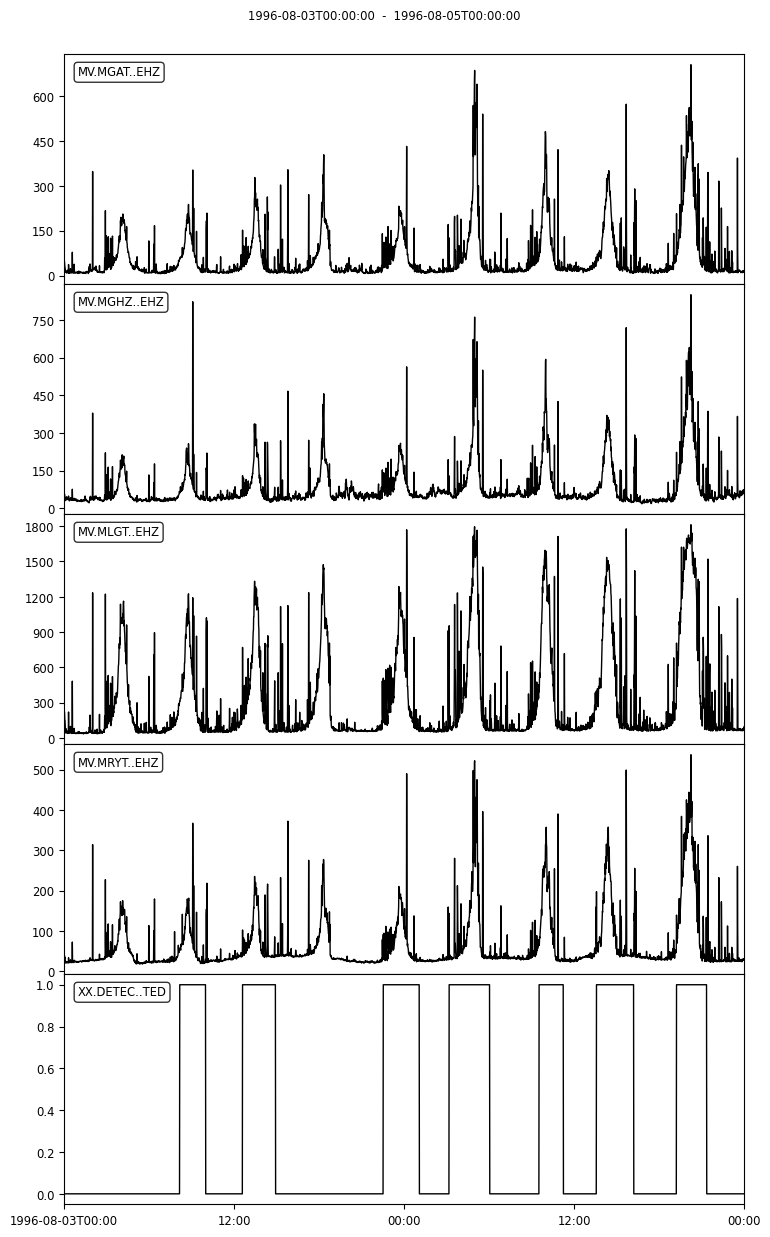

detection ON time for band 0: 1996-08-03T08:10:00.000000Z, duration: 109.0 mins
- interval (mins): 266.0
detection ON time for band 1: 1996-08-03T12:36:00.000000Z, duration: 139.0 mins
- interval (mins): 596.0
detection ON time for band 2: 1996-08-03T22:32:00.000000Z, duration: 152.0 mins
- interval (mins): 279.0
detection ON time for band 3: 1996-08-04T03:11:00.000000Z, duration: 171.0 mins
- interval (mins): 381.0
detection ON time for band 4: 1996-08-04T09:32:00.000000Z, duration: 102.0 mins
- interval (mins): 243.0
detection ON time for band 5: 1996-08-04T13:35:00.000000Z, duration: 148.0 mins
- interval (mins): 15.0
detection ON time for band 6: 1996-08-04T13:50:00.000000Z, duration: 142.0 mins
- interval (mins): 324.0
detection ON time for band 7: 1996-08-04T19:14:00.000000Z


In [65]:
from obspy.signal.trigger import coincidence_trigger
from pprint import pprint
import numpy as np

threshStations = 3

trig = coincidence_trigger("recstalta", threshON, threshOFF, st2, threshStations, sta=sta_minutes*60, lta=lta_minutes*60, max_trigger_length=2*lta_minutes*60, delete_long_trigger=True)

#pprint(trig)

lendata = len(st[0].data)
trdata = np.zeros( (lendata, ) )
detectionTrace = obspy.Trace( data = trdata ) 
detectionTrace.id = 'XX.DETEC..TED'
detectionTrace.stats.starttime = st2[0].stats.starttime
detectionTrace.stats.sampling_rate = st2[0].stats.sampling_rate
t = detectionTrace.times('utcdatetime')
for thistrig in trig:
    t0 = thistrig['time']
    t1 = (thistrig['time'] + thistrig['duration'])
    indices = np.where((t >= t0) & (t <= t1))
    #print(t0, t1, indices)
    detectionTrace.data[indices] = 1 #thistrig['duration']

st3 = st2.copy()
st3.append(detectionTrace)
st3.trim(obspy.core.UTCDateTime(1996,8,3), obspy.core.UTCDateTime(1996,8,5))
st3.plot(equal_scale=False);

detection_ON_times = [thistrig['time'].timestamp for thistrig in trig]
detection_intervals_minutes = np.diff(np.array(detection_ON_times))/60
for i,d in enumerate(detection_intervals_minutes):
    print(f"detection ON time for band {i}: {trig[i]['time']}, duration: {trig[i]['duration']/60} mins")
    print(f"- interval (mins): {detection_intervals_minutes[i]}")
print(f"detection ON time for band {i+1}: {trig[i+1]['time']}")

The bottom trace here corresponds to the detected events, and you can see they line up pretty well with the tremor bands, except the first one was missed.

This is similar to the banded tremor alarm system I wrote at MVO in 2000. And using this approach we can forecast the timing of the next tremor band. As it was the MVO Seismologist's job to manage the Operations Room, which included continuous seismic monitoring and two-way radio communications with MVO field crews, it was useful to predict tremor bands, as these were periods of heightened activity when field crews should not be on the flanks of the volcano.




In [66]:
# find peak value and peak time during each band
import pandas as pd
lod = []
tr = st3.select(id='MV.MLGT..EHZ')[0]
for thistrig in trig:
    bandstarttime = thistrig['time']
    bandendtime = thistrig['time'] + thistrig['duration']
    #bandTrace = maskedTrace.copy().trim(starttime=bandstarttime, endtime=bandendtime)    
    #bandpeaktime = bandstarttime + bandTrace.data.argmax() * tr.stats.delta
    tr2 = tr.copy().trim(starttime=bandstarttime, endtime=bandendtime)
    bandpeaktime = bandstarttime + tr2.data.argmax() * tr2.stats.delta
    band = {'starttime':bandstarttime, 'waxtime':bandpeaktime-bandstarttime, \
            'peaktime':bandpeaktime, 'wanetime':bandendtime-bandpeaktime, 'endtime':bandendtime, 'duration':thistrig['duration']}
    lod.append(band)


bandDf = pd.DataFrame(lod)
print(bandDf)

predicted = []
for col in ['starttime', 'peaktime', 'endtime']:
    interval = (bandDf.iloc[-1][col] - bandDf.iloc[0][col]) / (len(bandDf)-1) 
    predicted.append(bandDf.iloc[-1][col] + interval)
print('\nNext band prediction:')
print(' - start: ',predicted[0])
print(' - peak:  ',predicted[1])
print(' - end:   ',predicted[2])

                     starttime  waxtime                     peaktime  \
0  1996-08-03T08:10:00.000000Z   2220.0  1996-08-03T08:47:00.000000Z   
1  1996-08-03T12:36:00.000000Z   3060.0  1996-08-03T13:27:00.000000Z   
2  1996-08-03T22:32:00.000000Z   5940.0  1996-08-04T00:11:00.000000Z   
3  1996-08-04T03:11:00.000000Z   6480.0  1996-08-04T04:59:00.000000Z   
4  1996-08-04T09:32:00.000000Z   4800.0  1996-08-04T10:52:00.000000Z   
5  1996-08-04T13:35:00.000000Z   7560.0  1996-08-04T15:41:00.000000Z   
6  1996-08-04T13:50:00.000000Z   6660.0  1996-08-04T15:41:00.000000Z   
7  1996-08-04T19:14:00.000000Z   3660.0  1996-08-04T20:15:00.000000Z   

   wanetime                      endtime  duration  
0    4320.0  1996-08-03T09:59:00.000000Z    6540.0  
1    5280.0  1996-08-03T14:55:00.000000Z    8340.0  
2    3180.0  1996-08-04T01:04:00.000000Z    9120.0  
3    3780.0  1996-08-04T06:02:00.000000Z   10260.0  
4    1320.0  1996-08-04T11:14:00.000000Z    6120.0  
5    1320.0  1996-08-04T16:03:00.

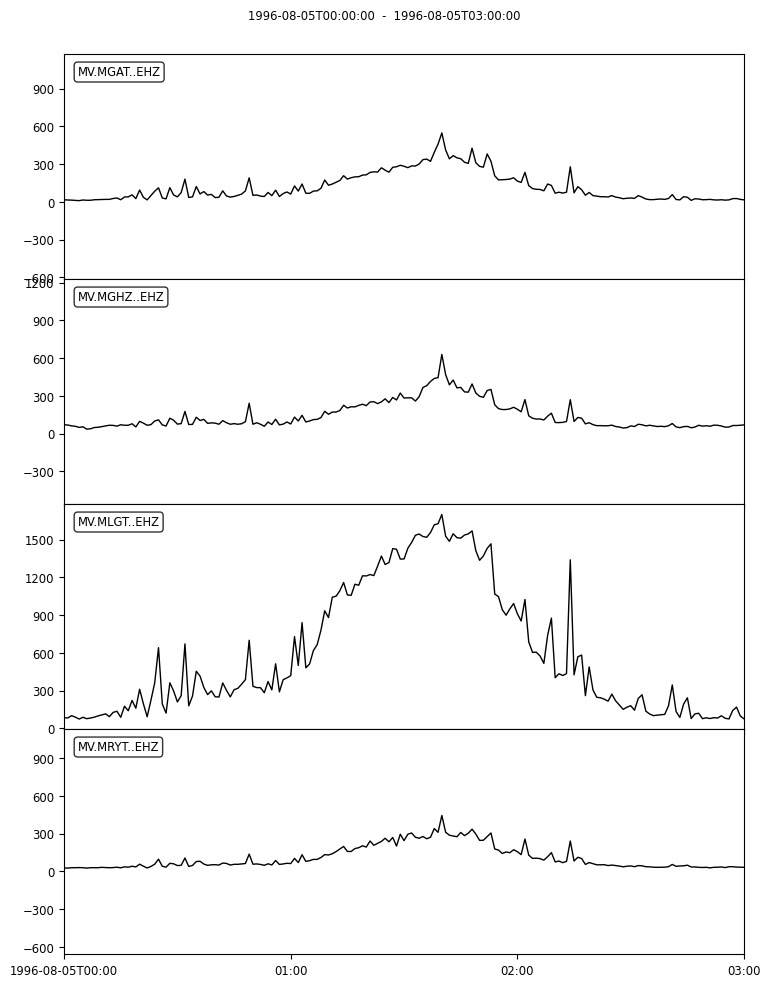

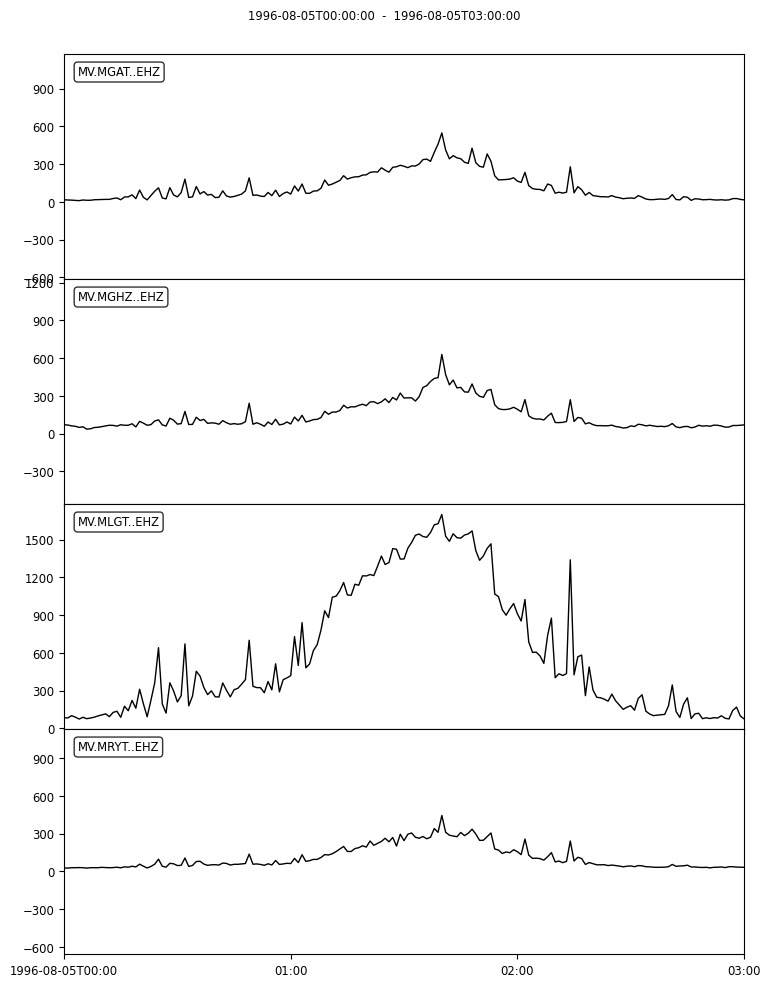

In [67]:
st5 = st.copy()
st5.trim(starttime = obspy.core.UTCDateTime(1996,8,5,0,0,0), endtime = obspy.core.UTCDateTime(1996,8,5,3,0,0) )
st5.plot()